# Louvain

This notebook illustrates the clustering of a graph by the [Louvain algorithm](https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering).

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sknetwork as skn

In [19]:
COLORS = ['r', 'g', 'b', 'c', 'm', 'y']

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Clustering**

In [4]:
louvain = skn.clustering.Louvain(engine='python')
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='python'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [5]:
labels = louvain.labels_
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [6]:
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2 3] [12 11  6  5]


**Visualization**

In [7]:
graph = nx.from_scipy_sparse_matrix(adjacency)

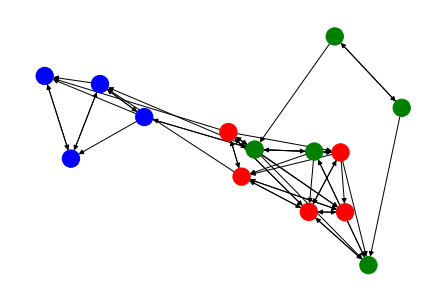

In [20]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph])

**Metrics**

In [10]:
modularity = skn.clustering.modularity

In [11]:
modularity(adjacency, labels)

0.4188034188034188

**Parameters**

In [12]:
# default engine = numba if available
louvain = skn.clustering.Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [13]:
# resolution parameter
louvain = skn.clustering.Louvain(resolution=2)
louvain.fit(adjacency)
labels = louvain.labels_
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2 3 4 5 6] [7 7 6 6 4 2 2]


## Directed graphs

**Loading**

In [14]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Clustering**

In [15]:
louvain = skn.clustering.Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [16]:
labels = louvain.labels_
print(labels)

[1 0 2 0 2 2 1 0 1 2 1 0 0 1]


In [17]:
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2] [5 5 4]


**Visualization**

In [18]:
graph = nx.from_scipy_sparse_matrix(adjacency,create_using=nx.DiGraph())

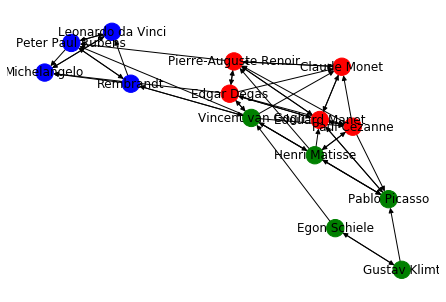

In [21]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph], labels=names)

**Metrics**

In [22]:
modularity(adjacency, labels)

0.31679999999999997

## Bipartite graphs

**Loading**

In [23]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [24]:
bilouvain = skn.clustering.BiLouvain()
bilouvain.fit(biadjacency)

BiLouvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [27]:
labels = bilouvain.labels_
col_labels = bilouvain.col_labels_
print(labels, col_labels)

[3 3 1 4 4 1 1 1 0 2 0 0 0 2 2] [2 3 3 1 1 0 4 1 1 0 0 2 2 0 2 0]


In [28]:
unique_labels, counts = np.unique(labels, return_counts=True)
_, col_counts = np.unique(col_labels, return_counts=True)
print(unique_labels, counts, col_counts)

[0 1 2 3 4] [4 4 3 2 2] [5 4 4 2 1]


In [29]:
# Graph as undirected (ignoring the bipartite structure)
louvain = skn.clustering.Louvain()
louvain.fit(skn.utils.adjacency_formats.bipartite2undirected(biadjacency))

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [30]:
labels_undirected = louvain.labels_[:biadjacency.shape[0]]
col_labels_undirected = louvain.labels_[biadjacency.shape[0]:]
print(labels_undirected, col_labels_undirected)

In [31]:
unique_labels_undirected, counts_undirected = np.unique(labels_undirected, return_counts=True)
_, col_counts_undirected = np.unique(col_labels_undirected, return_counts=True)
print(unique_labels_undirected, counts_undirected, col_counts_undirected)

[0 1 2 3] [5 4 3 3] [5 4 4 3]


**Visualization**

In [32]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [33]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [34]:
n1, n2 = biadjacency.shape
pos = {i: (0, i) for i in range(n1)} 
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)} 
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [35]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

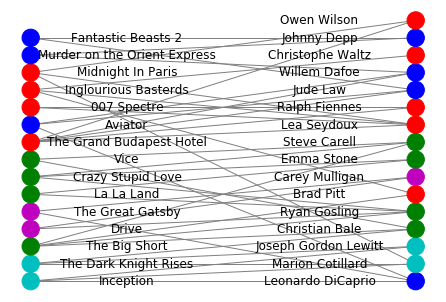

In [36]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[np.append(labels, col_labels)[i]] for i in graph], edge_color='grey')
show_labels = nx.draw_networkx_labels(graph, pos_labels, labels=names)

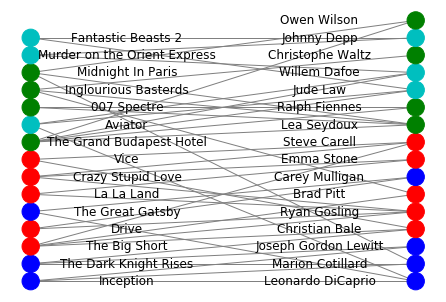

In [37]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[np.append(labels_undirected, col_labels_undirected)[i]] for i in graph], edge_color='grey')
show_labels = nx.draw_networkx_labels(graph, pos_labels, labels=names)

**Metrics**

In [38]:
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [39]:
skn.clustering.modularity(biadjacency, labels, col_labels)

0.5728732897085069

In [40]:
modularity(biadjacency, labels_undirected, col_labels_undirected)

0.5704937537180249